In [2]:
import cv2
import pytesseract
from hate_speech_classifier import classify
from matplotlib import pyplot as plt

/home/bartosz/code/Golem-2/venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
def blur_hate_speech(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                    cv2.CHAIN_APPROX_NONE)
        
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        
        cropped = img[y:y + h, x:x + w]
        is_hate_speech = False
        text = pytesseract.image_to_string(cropped)
        text = text.replace('\n', ' ')
        result = classify(text)
        if result == "hate-speech":
                    is_hate_speech = True
                
        if is_hate_speech:
            roi = img[y:y+h,  x:x+w]
            roi = cv2.GaussianBlur(roi, (23, 23), 30)
            img[y:y+roi.shape[0], x:x+roi.shape[1]] = roi
    return img

text 4,431 
RESULT no-hate-speech
text 1,393 
RESULT no-hate-speech
text 
RESULT no-hat-------------
text 
RESULT no-hat-------------
text 
RESULT no-hat-------------
text 
RESULT no-hat-------------
text 
RESULT no-hat-------------
text homosexual 
RESULT no-hate-speech
text 16h 
RESULT no-hate-speech
text ye @ResellCalendar - 16h Drake has come out to meas a 
RESULT no-hate-speech
text   
RESULT no-hate-speech
text 
RESULT no-hat-------------
text Flinders Retweeted 
RESULT no-hate-speech
text 248K 
RESULT no-hate-speech
text 55.1K 
RESULT no-hate-speech
text 5,878 
RESULT no-hate-speech
text 
RESULT no-hat-------------
text 
RESULT no-hat-------------
text 
RESULT no-hat-------------
text 
RESULT no-hat-------------
text w’ = ramen is sooo good » 
RESULT no-hate-speech
text » 
RESULT no-hate-speech
text 15h 
RESULT no-hate-speech
text @elonmusk - 
RESULT no-hate-speech
text Elon Musk € 
RESULT no-hate-speech
text 
RESULT no-hat-------------
text Blank. Retw

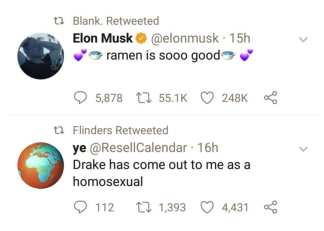

In [6]:
img = cv2.imread("8id7tr7xcb421.png")
img_blurred = blur_hate_speech(img)
plt.axis("off")
plt.imshow(img_blurred)